In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

import scaleogram as scg 
import pywt

# choose default wavelet function for the entire notebook
scg.set_default_wavelet('cmor1-1.5')

## Data

In [2]:
cols_keep=['heading', 'speaker', 'link_video', 'link_steno', 'index_pk',
       'index_snd', 'year', 'month', 'day', 'time', 'seconds_from_start',
       'video_link_wo_time', 'text_wo_punct', 'date', 'koosseis', 'fation',
       'ntoks', 'text_splitted', 'ntoks_splitted', 'doc_id', 'topic_id',
       'topic_prob', 'Name','Name_red_outliers']
df=pd.read_csv('data/interim/topics2022/stenos_cleaned_faction2022_topics.csv')[cols_keep]
df.shape

(465494, 24)

In [3]:
df_topics=pd.read_excel('data/interim/topics2022/topics_info2022_manual_review.xlsx')
df_topics=df_topics.set_index(df_topics.Name)
df_topics.shape

(2107, 9)

In [4]:
topics_meaningful=df_topics[df_topics.manual_cluster=='sisukas'].Name.tolist()
len(topics_meaningful)

1159

In [5]:
df['topic4analysis']=np.where(df.Name_red_outliers.isin(topics_meaningful), df.Name_red_outliers, '-1')

In [6]:
topics_environment=df_topics[df_topics.related2nature=='yes'].Name.tolist()
len(topics_environment)

37

In [7]:
df['topic4analysis_env']=np.where(df.topic4analysis.isin(topics_environment), df.topic4analysis, None)
df['topic4analysis_env_bin']=np.where(df.topic4analysis.isin(topics_environment), True, False)

## Caclulate environment topic segment share per week

In [8]:
df.head()

,heading,speaker,link_video,link_steno,index_pk,index_snd,year,month,day,time,...,text_splitted,ntoks_splitted,doc_id,topic_id,topic_prob,Name,Name_red_outliers,topic4analysis,topic4analysis_env,topic4analysis_env_bin
0,10:00 Istungi rakendamine,Aseesimees Siim Kallas,https://www.youtube.com/watch?v=GaFL2Zc4OMg&t=0,https://stenogrammid.riigikogu.ee/201911191000,PKP-25040,SND-559399,2019,11,19,10:00,...,auväärt kolleegid auväärt riigikogu tere hommi...,77,0,273.0,0.652444,273_kohaloleku_kontroll_arupärimisi_töönädala,273_kohaloleku_kontroll_arupärimisi_töönädala,-1,None,False
1,1.\n 10:02 Eesti Keske...,Aseesimees Siim Kallas,https://www.youtube.com/watch?v=GaFL2Zc4OMg&t=125,https://stenogrammid.riigikogu.ee/201911191000,PKP-25041,SND-559400,2019,11,19,10:02,...,täna on meil päevakorras olulise tähtsusega ri...,80,1,1243.0,0.572646,1243_ettekanne_teostamisel_minutit_tegevusest,1243_ettekanne_teostamisel_minutit_tegevusest,-1,None,False
2,1.\n 10:02 Eesti Keske...,Aseesimees Siim Kallas,https://www.youtube.com/watch?v=GaFL2Zc4OMg&t=125,https://stenogrammid.riigikogu.ee/201911191000,PKP-25041,SND-559400,2019,11,19,10:02,...,kuni 20 minutit riigikogu liige võib esitada e...,80,2,207.0,0.850651,207_ettekanne_sõnavõttudega_minutit_vastused,207_ettekanne_sõnavõttudega_minutit_vastused,-1,None,False
3,1.\n 10:02 Eesti Keske...,Aseesimees Siim Kallas,https://www.youtube.com/watch?v=GaFL2Zc4OMg&t=125,https://stenogrammid.riigikogu.ee/201911191000,PKP-25041,SND-559400,2019,11,19,10:02,...,pikendada istungi aega kuni päevakorrapunkti a...,75,3,139.0,0.818905,139_ammendumiseni_pikendada_kauem_kella,139_ammendumiseni_pikendada_kauem_kella,-1,None,False
4,1.\n 10:02 Eesti Keske...,Kersti Sarapuu,https://www.youtube.com/watch?v=GaFL2Zc4OMg&t=238,https://stenogrammid.riigikogu.ee/201911191000,PKP-25041,SND-559401,2019,11,19,10:02,...,lugupeetud istungi juhataja head kolleegid ja ...,80,4,-1.0,0.000000,-1_ma_te_me_et,1461_maksude_maksud_maksudega_mängita,1461_maksude_maksud_maksudega_mängita,None,False


In [9]:
df_env_day_share=pd.DataFrame(df.groupby(['year', 'month', 'day'])['topic4analysis_env_bin'].value_counts(normalize=True)).rename(columns={'topic4analysis_env_bin':'share'}).reset_index()
df_env_day_share=df_env_day_share[df_env_day_share.topic4analysis_env_bin]
df_env_day_share['time']=df_env_day_share.year.astype(str)+'-'+df_env_day_share.month.astype(str)+'-'+df_env_day_share.day.astype(str)

In [10]:
df_env_day_share.head()

,year,month,day,topic4analysis_env_bin,share,time
2,2010,1,12,True,0.008547,2010-1-12
4,2010,1,13,True,0.063253,2010-1-13
10,2010,1,25,True,0.422819,2010-1-25
13,2010,1,27,True,0.106267,2010-1-27
15,2010,1,28,True,0.079365,2010-1-28


In [11]:
df_env_day_share_sub=df_env_day_share[['time', 'share']]
df_env_day_share_sub=df_env_day_share_sub.set_index(df_env_day_share_sub.time)
df_env_day_share_sub.index = pd.DatetimeIndex(df_env_day_share_sub.index)
#add missing days
idx = pd.date_range('2010-1-1', '2022-12-31')
df_env_day_share_sub = df_env_day_share_sub.reindex(idx, fill_value=0)
#index set as year-week
df_env_day_share_sub.index = df_env_day_share_sub.index.strftime('%Y-%U')

In [12]:
#count per year-week sum
df_env_day_share_sub_w = df_env_day_share_sub.groupby(df_env_day_share_sub.index).sum()
df_env_day_share_sub_w=df_env_day_share_sub_w.share-df_env_day_share_sub_w.share.mean()
df_env_day_share_sub_w.head(20)

C:\Users\RistoHinno\AppData\Local\Temp\ipykernel_9096\1390512617.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_env_day_share_sub_w = df_env_day_share_sub.groupby(df_env_day_share_sub.index).sum()


2010-00   -0.042561
2010-01   -0.042561
2010-02    0.029239
2010-03   -0.042561
2010-04    0.565890
2010-05   -0.042561
2010-06    0.064458
2010-07    0.002921
2010-08    0.060477
2010-09   -0.042561
2010-10    0.150398
2010-11    0.084929
2010-12   -0.026505
2010-13   -0.042561
2010-14   -0.008976
2010-15   -0.029692
2010-16   -0.019076
2010-17   -0.042561
2010-18    0.050193
2010-19    0.017697
Name: share, dtype: float64

<Axes: >

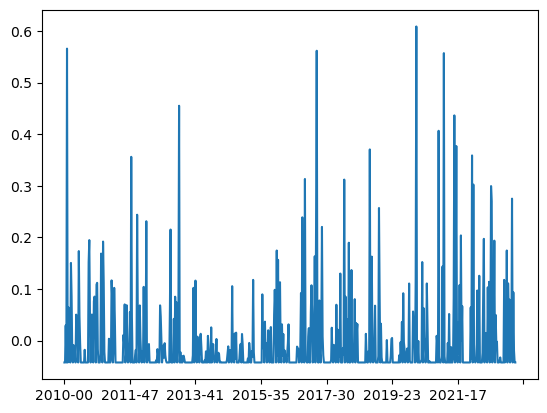

In [13]:
df_env_day_share_sub_w.plot()

## Plot scaleogram

In [14]:
def set_x_weekly(ax, weeks, start_year=2011, step=1):
    xlim  = (np.round([0, weeks]) / 53).astype(np.int32)
    ticks = np.arange(xlim[0], xlim[1], step)
    ax.set_xticks(ticks*53)
    ax.set_xticklabels(start_year + ticks)

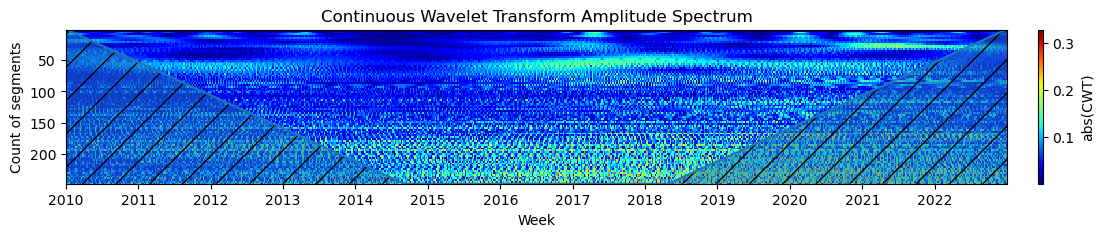

In [15]:
scales = scg.periods2scales(np.arange(1, 50+200, 3))
ax = scg.cws(df_env_day_share_sub_w, figsize=(13.2, 2), scales=scales,
             xlabel="Week", ylabel="Count of segments",coikw={'alpha':0.5,'hatch':'/'})
set_x_weekly(ax, len(df_env_day_share_sub_w), start_year=2010)

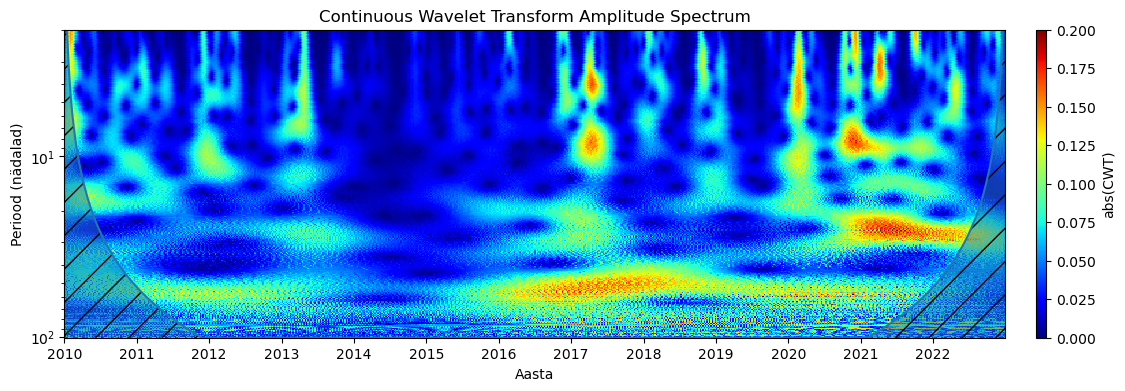

In [16]:
# log scale
scales = scg.periods2scales(np.logspace(np.log10(2), np.log10(50*2), 300))
cwt = scg.CWT(df_env_day_share_sub_w, scales=scales) 

ax  = scg.cws(cwt, figsize=(13.2, 4), xlabel="Aasta", ylabel="Periood (nädalad)", 
              yscale='log', coikw={'alpha':0.5,'hatch':'/'}, clim=(0, 0.2))
set_x_weekly(ax, len(df_env_day_share_sub_w), start_year=2010)